# Исследование авиакатастроф и происшествий #


Импортируем необходимые библиотеки и открываем датафрейм

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"/content/sample_data/команда_20.csv", encoding='ISO-8859-1')
df

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,11/21/2022,10:15,"Medellín, Colombia",AeroPaca SAS,NaN,Medellín - Pizarro,Piper PA-31-350 Navajo Chieftain,HK-5121,31-7652004,8.0,6.0,2.0,8.0,6.0,2.0,0.0,The plane was chartered to carry a team of six...
4994,1/15/2023,10:50,"Pokhara, Nepal",Yeti Airlines,YT691,Kathmandu - Pokhara,ATR 72-500-72-212-A,9NANC,754,72.0,68.0,4.0,72.0,68.0,4.0,0.0,"Before approach, the pilot requested a change ..."
4995,9/16/2023,NaN,"Barcelos, Brazil",Manaus Aerotaxi,NaN,NaN,Embraer EMB-110P1 Bandeirante,PT-SOG,110490,14.0,12.0,2.0,14.0,12.0,2.0,0.0,The air taxi crashed in heavy rain while attem...
4996,10/29/2023,6:30,"Rio Branco, Brazil",ART Taxi Aero,NaN,Rio Branco - Envira,Cessna 208B Grand Caravan,PT-MEE,208B0344,12.0,10.0,2.0,12.0,10.0,2.0,0.0,The air taxi crashed into a heavy wooded area ...


В нашем датафрейме 4998 строк и 17 столбцов

Определим тип данных в каждом признаке

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

Проверим, где присутствуют пропуски

In [ ]:

missing_summary = df.isnull().sum()
missing_summary

,0
Date,0
Time,1512
Location,4
Operator,10
Flight #,3669
Route,777
AC Type,15
Registration,274
cn/ln,668
Aboard,18


В каждом столбце есть пропуски

Удалим столбец “Flight”, так как в нем слишком много пропусков - 3669.
Также много пропусков в столбце “Time” - 1512, но удалить этот столбец нельзя, так как он важен, но и заменить пропуски на меру центральной тенденции было бы странно именно с этим признаком, поэтому просто оставим здесь пропуски. Если понадобится именно этот показатель, то специально для него можно удалить строки, где есть пропуски.
Пропуски в столбцах “Operator”, “AC Type” было решено заменить на моду, так как это категориальный тип данных и в данном случае логично заменять на самое часто встречающе
еся значение.
Пропуски в столбце “Aboard”, “Aboard Passangers”, “Aboard Crew” заменили на среднее зн
ачение, так как это покажет "среднее" число людей на борту, жертв или пострадавших на земле.
Пропуски в столбце “Fatalities”, “'Fatalities Passangers'”, “Fatalities Crew” заменили на моду
, так как большинство катастроф было с нулевым количеством жертв, но было несколько
с очень большим количеством, поэтому ни среднее, ни медиана здесь не подходят.
Остальные столбцы было решено оставить без изменений, так как это слишком специфич
ные категориальные данные, чтобы заменять их.

In [ ]:
med_ground = df['Ground'].median() #находим значения на которые будем заменять
mode_AC = df['AC Type'].mode()
mode_Operator = df['Operator'].mode()
mode_Fatalities = df['Fatalities'].mode()
mode_Fatalities_Passangers = df['Fatalities Passangers'].mode()
mode_Fatalities_Crew = df['Fatalities Crew'].mode()
mean_Aboard = df['Aboard'].mean()
mean_Aboard_Passangers = df['Aboard Passangers'].mean()
mean_Aboard_Crew = df['Aboard Crew'].mean()
df['Ground_fillna'] = df['Ground'].fillna(med_ground) #создаем новые признаки без пропусков
df['Operator_fillna'] = df['Operator'].fillna(mode_Operator)
df['AC Type_fillna'] = df['AC Type'].fillna(mode_AC)
df['Aboard_fillna'] = df['Aboard'].fillna(mean_Aboard)
df['Fatalities_fillna'] = df['Fatalities'].fillna(mode_Fatalities)
df['Fatalities Passangers_fillna'] = df['Fatalities Passangers'].fillna(mode_Fatalities_Passangers)
df['Fatalities Crew_fillna'] = df['Fatalities Crew'].fillna(mode_Fatalities_Crew)
df['Aboard_Passangers_fillna'] = df['Aboard'].fillna(mean_Aboard_Passangers)
df['Aboard_Crew_fillna'] = df['Aboard'].fillna(mean_Aboard_Crew)
df_cleaned = df.drop(columns=['Flight #', 'Ground', 'AC Type', 'Operator', 'Aboard', 'Aboard Crew',
                              'Aboard Passangers', 'Fatalities', 'Fatalities Passangers', 'Fatalities Crew']) #удаляем старые столбцы
df_cleaned

,Date,Time,Location,Route,Registration,cn/ln,Summary,Ground_fillna,Operator_fillna,AC Type_fillna,Aboard_fillna,Fatalities_fillna,Fatalities Passangers_fillna,Fatalities Crew_fillna,Aboard_Passangers_fillna,Aboard_Crew_fillna
0,9/17/1908,17:18,"Fort Myer, Virginia",Demonstration,NaN,1,"During a demonstration flight, a U.S. Army fly...",0.0,Military - U.S. Army,Wright Flyer III,2.0,1.0,1.0,0.0,2.0,2.0
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",Air show,SC1,NaN,Eugene Lefebvre was the first pilot to ever be...,0.0,NaN,Wright Byplane,1.0,1.0,0.0,0.0,1.0,1.0
2,7/12/1912,6:30,"Atlantic City, New Jersey",Test flight,NaN,NaN,First U.S. dirigible Akron exploded just offsh...,0.0,Military - U.S. Navy,Dirigible,5.0,5.0,0.0,5.0,5.0,5.0
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",NaN,NaN,NaN,The first fatal airplane accident in Canada oc...,0.0,Private,Curtiss seaplane,1.0,1.0,0.0,1.0,1.0,1.0
4,9/9/1913,18:30,Over the North Sea,NaN,NaN,NaN,The airship flew into a thunderstorm and encou...,0.0,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,NaN,NaN,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,11/21/2022,10:15,"Medellín, Colombia",Medellín - Pizarro,HK-5121,31-7652004,The plane was chartered to carry a team of six...,0.0,AeroPaca SAS,Piper PA-31-350 Navajo Chieftain,8.0,8.0,6.0,2.0,8.0,8.0
4994,1/15/2023,10:50,"Pokhara, Nepal",Kathmandu - Pokhara,9NANC,754,"Before approach, the pilot requested a change ...",0.0,Yeti Airlines,ATR 72-500-72-212-A,72.0,72.0,68.0,4.0,72.0,72.0
4995,9/16/2023,NaN,"Barcelos, Brazil",NaN,PT-SOG,110490,The air taxi crashed in heavy rain while attem...,0.0,Manaus Aerotaxi,Embraer EMB-110P1 Bandeirante,14.0,14.0,12.0,2.0,14.0,14.0
4996,10/29/2023,6:30,"Rio Branco, Brazil",Rio Branco - Envira,PT-MEE,208B0344,The air taxi crashed into a heavy wooded area ...,0.0,ART Taxi Aero,Cessna 208B Grand Caravan,12.0,12.0,10.0,2.0,12.0,12.0


Теперь, проведем проверку на дубликаты

In [ ]:
duplicates = df_cleaned.duplicated().sum()

В датасете нет полных дубликатов, ни строк, ни столбцов.

Для определения выбросов будем обращаться только к количественным данным,
кроме колонки “cn/ln”, так как это номер самолета и выбросы там смотреть
бессмысленно. Для работы с остальными количественными данными пользовались
методом 3 сигм (применили с помощью функции общего вида).

In [ ]:
def remove_outliers(df, target_columns):
    for col in target_columns:
        mean = df[col].mean()
        std_dev = df[col].std()
        lower_bound = mean - 3 * std_dev
        upper_bound = mean + 3 * std_dev
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
target_columns = ['Aboard_fillna', 'Aboard_Passangers_fillna', 'Aboard_Crew_fillna',
                  'Fatalities_fillna',  'Fatalities Passangers_fillna', 'Fatalities Crew_fillna']
df_cleaned_no_outliers = remove_outliers(df_cleaned, target_columns)
df_cleaned_no_outliers

,Date,Time,Location,Route,Registration,cn/ln,Summary,Ground_fillna,Operator_fillna,AC Type_fillna,Aboard_fillna,Fatalities_fillna,Fatalities Passangers_fillna,Fatalities Crew_fillna,Aboard_Passangers_fillna,Aboard_Crew_fillna
0,9/17/1908,17:18,"Fort Myer, Virginia",Demonstration,NaN,1,"During a demonstration flight, a U.S. Army fly...",0.0,Military - U.S. Army,Wright Flyer III,2.0,1.0,1.0,0.0,2.0,2.0
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",Air show,SC1,NaN,Eugene Lefebvre was the first pilot to ever be...,0.0,NaN,Wright Byplane,1.0,1.0,0.0,0.0,1.0,1.0
2,7/12/1912,6:30,"Atlantic City, New Jersey",Test flight,NaN,NaN,First U.S. dirigible Akron exploded just offsh...,0.0,Military - U.S. Navy,Dirigible,5.0,5.0,0.0,5.0,5.0,5.0
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",NaN,NaN,NaN,The first fatal airplane accident in Canada oc...,0.0,Private,Curtiss seaplane,1.0,1.0,0.0,1.0,1.0,1.0
23,12/16/1918,NaN,"Elizabeth, New Jersey",NaN,97,NaN,Carl Smith was killed when his mail plane feet...,0.0,US Aerial Mail Service,De Havilland DH-4,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,11/6/2022,8:53,"Bukoba, Tanzania",Dar es-Salaam -Bukoba,5H-PWF,819,"While on final approach to Bukoba Airport, the...",0.0,Precision Air,ATR 42-500,43.0,19.0,17.0,2.0,43.0,43.0
4993,11/21/2022,10:15,"Medellín, Colombia",Medellín - Pizarro,HK-5121,31-7652004,The plane was chartered to carry a team of six...,0.0,AeroPaca SAS,Piper PA-31-350 Navajo Chieftain,8.0,8.0,6.0,2.0,8.0,8.0
4995,9/16/2023,NaN,"Barcelos, Brazil",NaN,PT-SOG,110490,The air taxi crashed in heavy rain while attem...,0.0,Manaus Aerotaxi,Embraer EMB-110P1 Bandeirante,14.0,14.0,12.0,2.0,14.0,14.0
4996,10/29/2023,6:30,"Rio Branco, Brazil",Rio Branco - Envira,PT-MEE,208B0344,The air taxi crashed into a heavy wooded area ...,0.0,ART Taxi Aero,Cessna 208B Grand Caravan,12.0,12.0,10.0,2.0,12.0,12.0


Итого после очистки от выбросов и пропусков осталось 4135 строк и 16 столбцов. То есть
выбросы и пропуски составляли примерно 17% от общего количества данных

In [ ]:
df_cleaned_no_outliers.describe()

,Ground_fillna,Aboard_fillna,Fatalities_fillna,Fatalities Passangers_fillna,Fatalities Crew_fillna,Aboard_Passangers_fillna,Aboard_Crew_fillna
count,4135.000000,4135.000000,4135.000000,4135.00000,4135.000000,4135.000000,4135.000000
mean,0.536155,18.209285,13.678597,10.65925,3.031681,18.207260,18.196362
std,5.684418,16.521981,13.243978,12.26096,2.148618,16.520645,16.522266
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,3.000000,1.00000,1.000000,5.000000,5.000000
50%,0.000000,13.000000,9.000000,6.00000,3.000000,13.000000,13.000000
75%,0.000000,26.000000,20.000000,17.00000,4.000000,26.000000,26.000000
max,225.000000,94.000000,63.000000,53.00000,11.000000,94.000000,94.000000


- Ground_fillna: 50% (медиана): 0.0 – половина происшествий не затрагивают людей
на земле. Большинство происшествий не затрагивают людей на земле, но редкие
катастрофы приводят к массовым жертвам.
-  Aboard_fillna: 50% (медиана): 13.0 – по ловина происшествий связана с самолётами,
на которых находилось менее 13 человек. Среднее: 18.2, максимум: 94 – указывает на
наличие более крупных самолётов с максимальным числом людей на борту 94.
Большая часть катастроф связана с небольшими самолётами.
-  Fatalities_fillna: Количество жертв на борту варьируется, но значительная часть
случаев имеет менее 10 погибших. · 50% (медиана): 9.0 – в большинстве
происшествий погибает менее 10 человек. Среднее: 13.68, максимум: 63 – показывает,
что в отдельных катастрофах число погибших достигает 63 человек.
- Fatalities Crew_fillna: 50% (медиана): 3.0 – в большинстве случаев погибает весь
экипаж (обычно 3 человека). Максимум: 11 – в редких случаях погибает до 11 членов
экипажа. Большинство происшествий приводят к гибели всего экипажа.

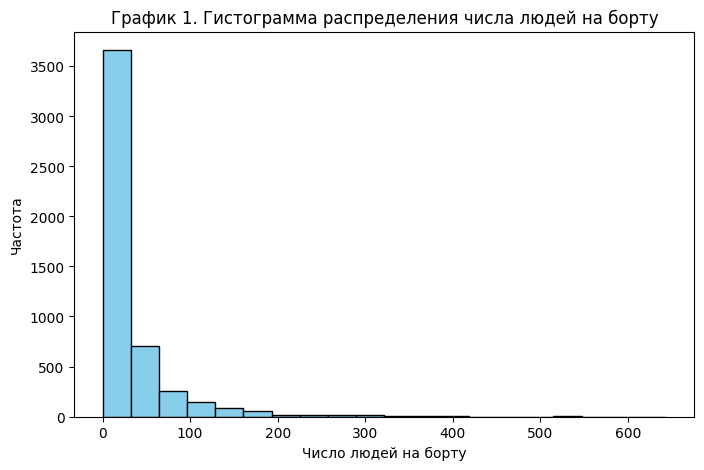

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Aboard'], bins=20, color='skyblue',  edgecolor='black') #благодаря матплотлибу можно не считать частотную таблицу самому
plt.title('График 1. Гистограмма распределения числа людей на борту')
plt.xlabel('Число людей на борту')
plt.ylabel('Частота')
plt.show()

#### Анализ распределения числа людей на борту (График 1):
Пик в начале (0-30 человек): Большинство происшествий происходят с небольшими
самолётами, на которых всего несколько десятков человек. Это указывает на то, что
многие катастрофы происходят в малой авиации или на рейсах с ограниченным
количеством пассажиров. После первого пика наблюдается резкое уменьшение частоты.
Это говорит о том, что количество катастроф с более многолюдными рейсами (например,
с 100 или более людьми) значительно меньше. Часто более крупные самолёты (с
количеством пассажиров более 100) участвуют в инцидентах реже.
Распределение скошенно влево: Большая часть данных сосредоточена в низких значениях
(меньше 50 человек на борту), а по мере увеличения числа пассажиров катастрофы
становятся всё более редкими. Выбросы: На графике видно, что есть несколько
экстремальных значений, указывающих на крупные катастрофы с большим числом людей
на борту (до 600 человек). Выбросы с большим количеством погибших на борту скорее
являются исключениями, а не частью повседневной статистики.

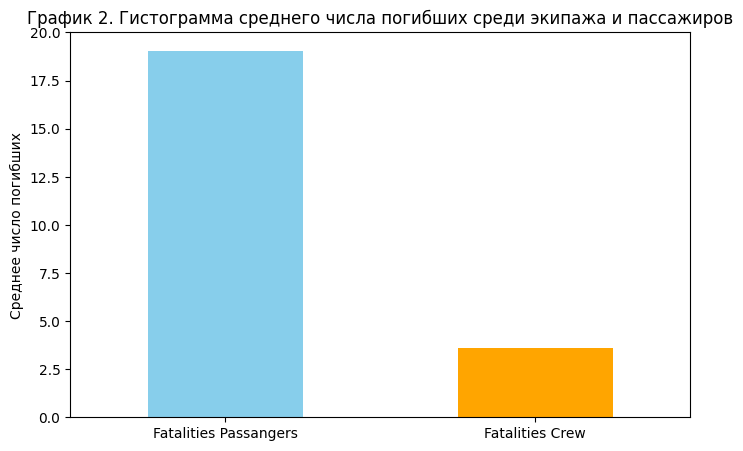

In [ ]:
plt.figure(figsize=(8, 5))
plt.title("График 2. Гистограмма среднего числа погибших среди экипажа и пассажиров")
df[['Fatalities Passangers', 'Fatalities Crew']].mean().plot(kind='bar', color=['skyblue', 'orange'])
plt.ylabel('Среднее число погибших')
plt.xticks(rotation=0)
plt.show()

#### Анализ столбчатого графика среднего числа погибших среди пассажиров и экипажа(График 2):
Пассажиры погибают в среднем гораздо чаще (примерно 19 человек), чем экипаж (примерно 3 человека),
что логично, так как пассажиров больше чем членов экипажа

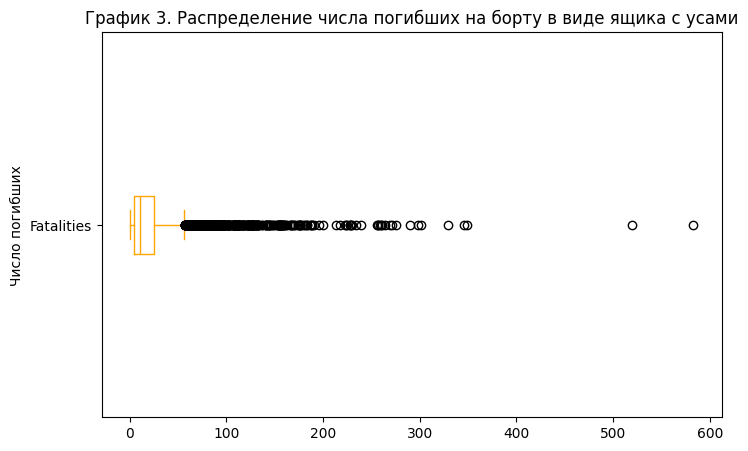

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('График 3. Распределение числа погибших на борту в виде ящика с усами')
df['Fatalities'].plot(kind='box', vert=False, color='orange')
plt.ylabel('Число погибших')
plt.show()

#### Анализ распределения числа погибших в виде ящика графика с усами (График 3):
Медиана расположена в районе низких значений (около 10-20 погибших). Это говорит о
том, что в большинстве происшествий число погибших относительно небольшое.
Размер ящика (IQR): Границы самого ящика показывают, что 50% значений (между Q1 и
Q3) находятся в диапазоне от 0 до 50 погибших. Это указывает на концентрацию
большинства катастроф с числом погибших ниже 50 человек. Усы: нижний ус тянется к 0,
что указывает на катастрофы без погибших. Верхний ус ограничивается значением около
100-150 погибших, за пределами которого начинаются выбросы. Выбросы: наблюдается
большое количество выбросов, превышающих значение 150-600 погибших. Это крупные
катастрофы с аномально большим числом жертв. Такие выбросы можно считать редкими
событиями, которые искажают общую картину распределения.

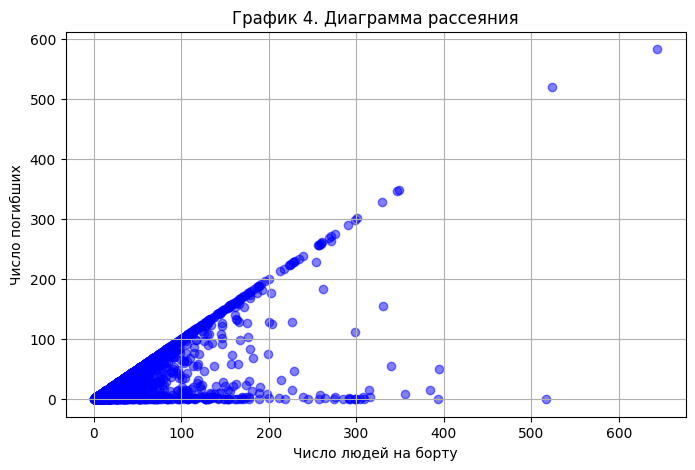

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Aboard'], df['Fatalities'], color='blue', alpha=0.5)
plt.title('График 4. Диаграмма рассеяния')
plt.xlabel('Число людей на борту')
plt.ylabel('Число погибших')
plt.grid(True)
plt.show()

#### Анализ диаграммы рассеяния (График 4):
Число людей на борту (Aboard) и Число погибших (Fatalities) имеют положительную
зависимость: чем больше людей на борту, тем выше вероятность большого числа
погибших. В нижней части графика видно значительное количество случаев с нулевым
числом погибших даже при большом числе людей на борту. Это может указывать на
успешные аварийные посадки или инциденты без жертв. Есть выбросы с экстремально
большим числом погибших (более 500 человек) при максимальном числе людей на
борту.

## Корреляционный анализ

Построим общую корреляционную матрицу



In [ ]:
corr_matr = df_cleaned_no_outliers.corr(numeric_only=True).round(2)
corr_matr

,Ground_fillna,Aboard_fillna,Fatalities_fillna,Fatalities Passangers_fillna,Fatalities Crew_fillna,Aboard_Passangers_fillna,Aboard_Crew_fillna
Ground_fillna,1.00,-0.04,-0.05,-0.05,0.01,-0.04,-0.04
Aboard_fillna,-0.04,1.00,0.73,0.75,0.23,1.00,1.00
Fatalities_fillna,-0.05,0.73,1.00,0.99,0.52,0.73,0.73
Fatalities Passangers_fillna,-0.05,0.75,0.99,1.00,0.39,0.75,0.75
Fatalities Crew_fillna,0.01,0.23,0.52,0.39,1.00,0.23,0.23
Aboard_Passangers_fillna,-0.04,1.00,0.73,0.75,0.23,1.00,1.00
Aboard_Crew_fillna,-0.04,1.00,0.73,0.75,0.23,1.00,1.00


Заметим, что самая сильная корреляция не считая автокорреляции - это значение 1.00 между Aboard_Passangers_fillna и Aboard_fillna, Aboard_Crew_fillna и Aboard_fillna. То есть у нас замечана сильная линейная взаимосвязь между общим количеством человек на борту с количеством пассажиров и количеством экипажа соответственно, поэтому будем считать это за автокорреляцию. Следующее значение корреляции 0.99 между Fatalities Passangers_fillna и Fatalities_fillna, то есть есть сильная линейная взаимосвязь между общим числом погибщих и количеством погибших пассажиров, что нельзя сказать про взаимосвязь общего количетсва погибших с количеством погибшего экипажа, но признак Fatalities_fillna является суммой Fatalities Passangers_fillna и Fatalities Crew_fillna, так что высокая корреляция тут происходит автоматически. Таким образом самая большая линейная зависимость между количетсвом людей на борту и количеством погибших среди пассажиров. Эта связь положительна: чем больше количество людей за бортом самолета, тем больше жертв в чрезвычайно ситуации среди пассажиров.

Построим график рассеяния между этими признаками

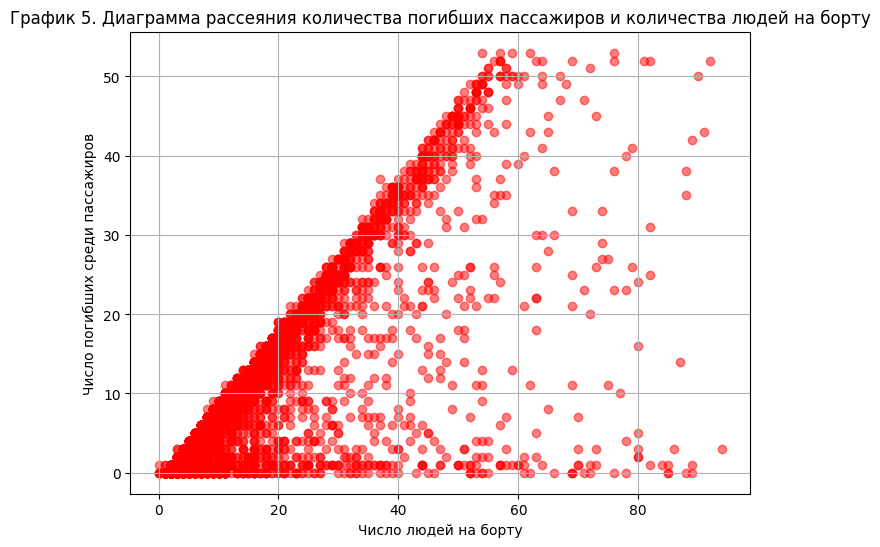

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned_no_outliers['Aboard_fillna'], df_cleaned_no_outliers['Fatalities Passangers_fillna'], color='red', alpha=0.5)
plt.title('График 5. Диаграмма рассеяния количества погибших пассажиров и количества людей на борту')
plt.xlabel('Число людей на борту')
plt.ylabel('Число погибших среди пассажиров')
plt.grid(True)
plt.show()

#### Хотим построить модель, которая будет предсказывать общее количество погибших

В качестве независимых переменных выберем количество людей на борту (Aboard_fillna), признак, который покажет, что оператором был Аэрофлот и количество погибшего экипажа (Fatalities Crew_fillna).

Сначала преобразуем признак оператора

In [ ]:
df_cleaned_no_outliers['Aeroflot'] = df_cleaned_no_outliers['Operator_fillna'].apply(lambda x: 'yes' if x=='Aeroflot' else 'no')
df_cleaned_no_outliers['Aeroflot2'] = df_cleaned_no_outliers['Aeroflot']
df_clean_2 = pd.get_dummies(df_cleaned_no_outliers, columns=['Aeroflot2'], dtype = int)
df_clean_2.drop(['Aeroflot2_no'], axis = 1, inplace = True)
df_clean_2.head()

,Date,Time,Location,Route,Registration,cn/ln,Summary,Ground_fillna,Operator_fillna,AC Type_fillna,Aboard_fillna,Fatalities_fillna,Fatalities Passangers_fillna,Fatalities Crew_fillna,Aboard_Passangers_fillna,Aboard_Crew_fillna,Aeroflot,Aeroflot2_yes
0,9/17/1908,17:18,"Fort Myer, Virginia",Demonstration,NaN,1,"During a demonstration flight, a U.S. Army fly...",0.0,Military - U.S. Army,Wright Flyer III,2.0,1.0,1.0,0.0,2.0,2.0,no,0
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",Air show,SC1,NaN,Eugene Lefebvre was the first pilot to ever be...,0.0,NaN,Wright Byplane,1.0,1.0,0.0,0.0,1.0,1.0,no,0
2,7/12/1912,6:30,"Atlantic City, New Jersey",Test flight,NaN,NaN,First U.S. dirigible Akron exploded just offsh...,0.0,Military - U.S. Navy,Dirigible,5.0,5.0,0.0,5.0,5.0,5.0,no,0
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",NaN,NaN,NaN,The first fatal airplane accident in Canada oc...,0.0,Private,Curtiss seaplane,1.0,1.0,0.0,1.0,1.0,1.0,no,0
23,12/16/1918,NaN,"Elizabeth, New Jersey",NaN,97,NaN,Carl Smith was killed when his mail plane feet...,0.0,US Aerial Mail Service,De Havilland DH-4,1.0,1.0,0.0,1.0,1.0,1.0,no,0


### Построим линейную регрессию

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

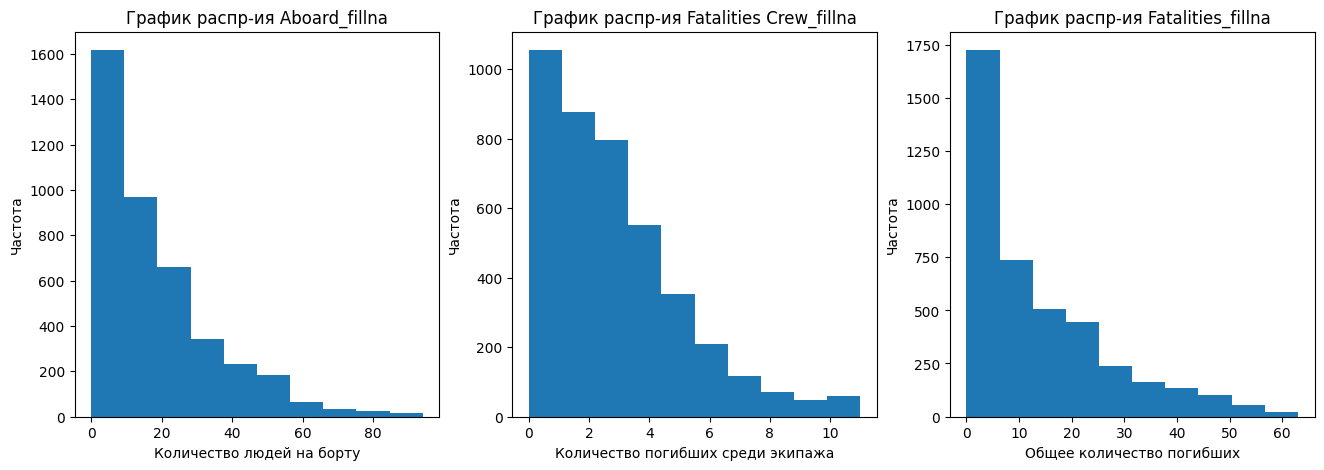

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (16,5))

lst = ['Aboard_fillna', 'Fatalities Crew_fillna', 'Fatalities_fillna']
x = ['Количество людей на борту', 'Количество погибших среди экипажа', 'Общее количество погибших']
ttl = ['График распр-ия Aboard_fillna', 'График распр-ия Fatalities Crew_fillna', 'График распр-ия Fatalities_fillna']

for i in range(len(lst)):
    ax[i].hist(df_clean_2[lst[i]])
    ax[i].set_ylabel('Частота')
    ax[i].set_xlabel(x[i])
    ax[i].set_title(ttl[i])


Заметим, что распредление признаков сильно скошено влево, попробуем это исправить с помощью логарифма

In [ ]:
import numpy as np
df_clean_2['log_Aboard'] = np.log(df_clean_2['Aboard_fillna'] + 1) #прибавили 1 так как в наших наблюдениях есть нулевые значения
df_clean_2['log_Fatalities Crew'] = np.log(df_clean_2['Fatalities Crew_fillna'] + 1)
df_clean_2['log_Fatalities'] = np.log(df_clean_2['Fatalities_fillna'] + 1)

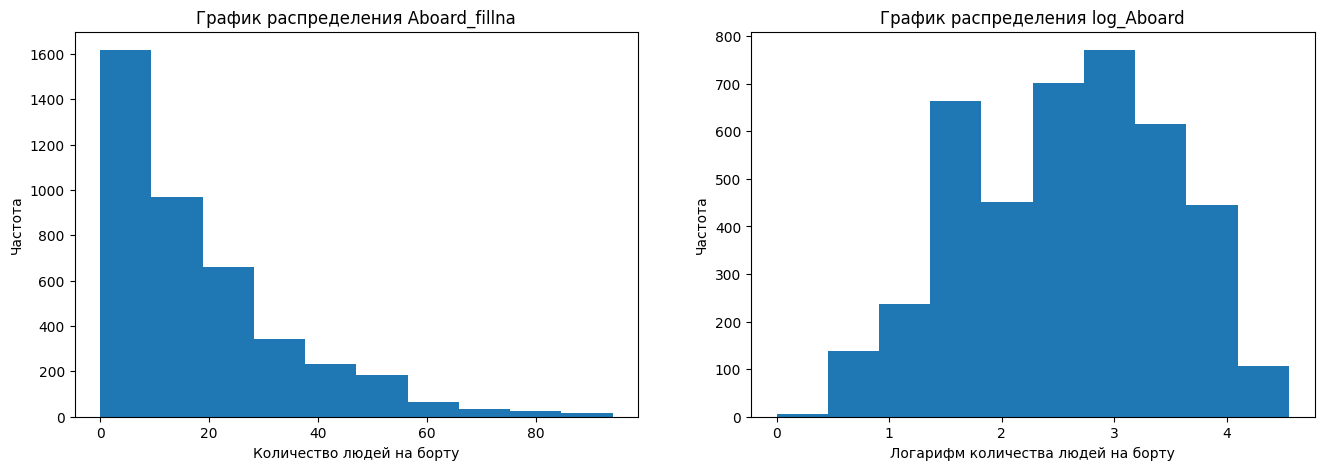

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16,5))

lst = ['Aboard_fillna', 'log_Aboard']
ttl = ['График распределения Aboard_fillna', 'График распределения log_Aboard']
x = ['Количество людей на борту', 'Логарифм количества людей на борту']

for i in range(len(lst)):
    ax[i].set_title(ttl[i])
    ax[i].hist(df_clean_2[lst[i]])
    ax[i].set_ylabel('Частота')
    ax[i].set_xlabel(x[i])



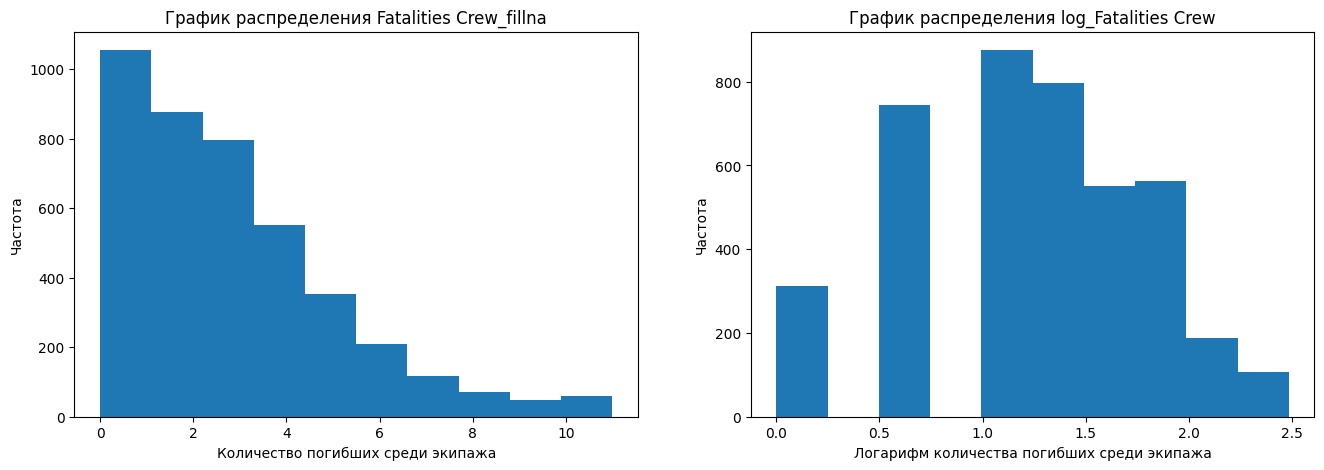

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16,5))

lst1 = ['Fatalities Crew_fillna', 'log_Fatalities Crew']
ttl = ['График распределения Fatalities Crew_fillna', 'График распределения log_Fatalities Crew']
x = ['Количество погибших среди экипажа', 'Логарифм количества погибших среди экипажа']

for j in range(len(lst1)):
    ax[j].hist(df_clean_2[lst1[j]])
    ax[j].set_title(ttl[j])
    ax[j].set_ylabel('Частота')
    ax[j].set_xlabel(x[j])

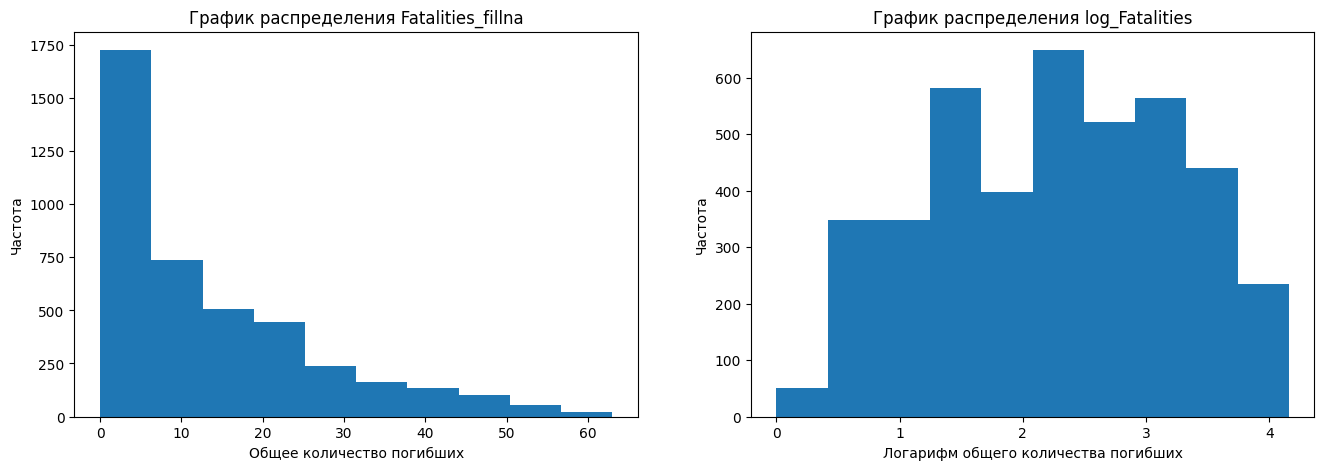

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16,5))

lst1 = ['Fatalities_fillna', 'log_Fatalities']
ttl = ['График распределения Fatalities_fillna', 'График распределения log_Fatalities']
x = ['Общее количество погибших', 'Логарифм общего количества погибших']

for j in range(len(lst1)):
    ax[j].hist(df_clean_2[lst1[j]])
    ax[j].set_title(ttl[j])
    ax[j].set_ylabel('Частота')
    ax[j].set_xlabel(x[j])


Итак, посмотрим графики рассеяния с новыми признаками

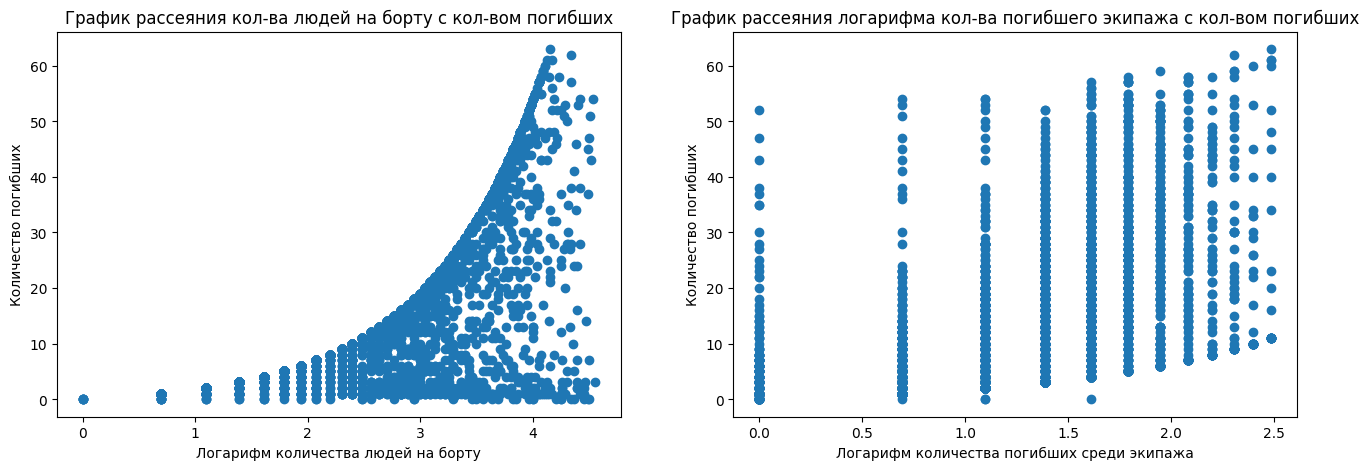

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (16,5))

lst = ['log_Aboard', 'log_Fatalities Crew']
x = ['Логарифм количества людей на борту', 'Логарифм количества погибших среди экипажа']
ttl = ['График рассеяния кол-ва людей на борту с кол-вом погибших', 'График рассеяния логарифма кол-ва погибшего экипажа с кол-вом погибших']

for i in range(len(lst)):
    ax[i].scatter(df_clean_2[lst[i]], df_clean_2['Fatalities_fillna'])
    ax[i].set_ylabel('Количество погибших')
    ax[i].set_xlabel(x[i])
    ax[i].set_title(ttl[i])

Теперь, можно приступать к построению линейной регрессии

Делим выборку на тренировочную и тестовую

In [ ]:
X = df_clean_2[['log_Aboard','log_Fatalities Crew','Aeroflot2_yes']]
Y = df_clean_2['log_Fatalities']

(X_train, X_test, y_train, y_test) = train_test_split(X, Y, test_size = 0.2, random_state=42)

Обучаем модель:

In [ ]:
x_train = X_train[['log_Aboard','log_Fatalities Crew','Aeroflot2_yes']]
lin_model = LinearRegression().fit(x_train, y_train)

Коэффиценты w1, w2, w3

In [ ]:
lin_model.coef_.round(2)

array([0.66, 0.77, 0.  ])

Свободный коэфициент

In [ ]:
lin_model.intercept_.round(2)

np.float64(-0.4)

Итого, наша модель:

 ln(Fatalities + 1) = -0.4 +  0.66 * ln(Aboard + 1) + 0.77 * ln(Fatalities Crew + 1) - 0.00 *Aeroflot_yes

Интерпретация коэффициентов

 - $w_0=-0.04$ : Если все предикторы равны 0, то число жертв равно  $ \ e ^ {-0.4} -1$. Если нет людей на борту, нет жертв среди экипажа и опеатор не аэрофлот, то количетсво жертв отрицательно(что невозможно, как и крушение самолета, на борту которого никого нет, даже пилота)
 - $w_1 = 0.66$ : Если количество людей на борту увеличится на $1$%, то количество жертв вырастет на $0.66$%
 - $w_2 = 0.77$ : Если количество жертв среди экипажа на борту увеличится на $1$%, то общее количество жертв вырастет на $0.77$%
 - $w_3 = 0.00$ : Если оператором полета станет не аэрофлот, то количество жертв сократится на $0$%
   

Как можно заметить, предиктор Aeroflot2_yes не влияет на модель, так как коэффициент перед ним равен 0. Мы попытались взять другие признаки для построения модели: пробовали взять другие количественные признаки, но они либо являются автокорреляцией для признака, который мы включили в модель, либо не коррелируют вовсе, а категориальные признаки не получилось адекватно включить в модель, поскольку довольно много уникальных значений. Итого, было найдено только 2 признака, которые мы смогли подобрать из датасета для модели.

Оценим качество модели

Коэффициент детерминации

In [ ]:
y_test_pred = lin_model.predict(X_test)
r2_score(y_test, y_test_pred)

0.7630869481246887

$r^2$ ближе к 1, что свидетельствует о хорошем качестве модели. Модель описывает примерно 76% данных.

Среднеквадратичная ошибка (MSE)

In [ ]:
mean_squared_error(y_test, y_test_pred)

0.23018366905420404

Модель ошибается, чтобы понять ее качество на основе среднеквадратичной ошибки нужно эту метрику сравнивнить с такой же метрикой другой модели. Но, зная, что MSE измеряется от 0 до +∞, то у нас она ближе к 0.

Среднеабсолютная ошибка (MAE)

In [ ]:
mean_absolute_error(y_test, y_test_pred)

0.34744941519377537

Модель ошибается, чтобы понять ее качество на основе среднеабсолютной ошибки нужно эту метрику сравнивнить с такой же метрикой другой модели. Но, зная, что MAE измеряется от 0 до +∞, то у нас она ближе к 0.

### Доверительный интервал

Через z-статистику

Соберем выборку из признака "Общее количество жертв" из 1000 наблюдений

In [ ]:
subset_df = df_clean_2['Fatalities_fillna'].sample(n=1000, random_state = 42)
subset_df


,Fatalities_fillna
3476,0.0
1342,25.0
3006,3.0
1962,11.0
1211,46.0
...,...
1358,2.0
1741,2.0
1504,8.0
3955,3.0


In [ ]:
from scipy import stats
gamma = 0.95
n = 1000
mean = subset_df.mean()
sigma = df_clean_2['Fatalities_fillna'].std()
res_z = stats.norm.interval(gamma,
                          loc=mean,
                          scale=sigma/np.sqrt(n))
res_z

(np.float64(12.447144796122972), np.float64(14.08885520387703))

С вероятностью 95%, среднее количество жертв лежит в интервале (12.447, 14.089)

Через t-статистику

In [ ]:
n = 1000
mean = subset_df.mean()
gamma = 0.95
s = subset_df.std()
res_t = stats.t.interval(gamma,
                       df = n - 1,
                       loc = mean,
                       scale = s/np.sqrt(n))
res_t

(np.float64(12.450634323564628), np.float64(14.085365676435373))

С вероятностью 95%, среднее количество жертв лежит в интервале (12.450, 14.085)

### Тестирование гипотез###

Через Z-тест

#### Гипотеза: Наше выборочное среднее по общему количеству жертв равно математическому ожиданию генеральной совокупности
$$H_0: \mu = 13,68$$
$$H_A: \mu \neq 13,68$$

In [ ]:
mu = df_clean_2['Fatalities_fillna'].mean()
from statsmodels.stats.weightstats import ztest as ztest
res_ztest = ztest(subset_df,
            value = mu,
            alternative = 'two-sided')
res_ztest

(np.float64(-0.9857670892175102), np.float64(0.32424741907222987))

In [ ]:
p_value = res_ztest[1]
p_value

np.float64(0.32424741907222987)

По итогам тестирования гипотезы p-value=0.32.

Это значит нулевая гипотеза не отвергается на всех адекватных уровнях значимости α


Через T-test

#### Гипотеза: Наше выборочное среднее по общему количеству жертв равно математическому ожиданию генеральной совокупности
$$H_0: \mu = 13,68$$
$$H_A: \mu \neq 13,68$$

In [ ]:
res_t_test = stats.ttest_1samp(subset_df,
                        popmean=mu,
                        alternative='two-sided')
p_value_t_test = res_t_test[1]
p_value_t_test

np.float64(0.32448610137068434)

По итогам тестирования гипотезы p-value=0.32.

Это значит нулевая гипотеза не отвергается на всех адекватных уровнях значимости α


### Тест на равенство математических ожиданий двух несвязанных выборок ###

Разделим генеральную совокупность на 2 выборки по году: до 1966 и после 1966.

In [ ]:
df_clean_2['Date'] = pd.to_datetime(df_clean_2['Date'])
df_clean_2['Year'] = df_clean_2['Date'].dt.year

In [ ]:
before_1966= df_clean_2[df_clean_2['Year']<1966]
after_1966 = df_clean_2[df_clean_2['Year']>1966]

Гипотеза: Математическое ожидание общего количества жертв в  авиакатастрофах до 1966 не равно математическому ожиданию общих жертв в авиакатастрофах после 1966
$$ H_0: \mu^{before\_1966} = \mu^{after\_1966} $$

$$ H_A: \mu^{before\_1966} \neq \mu^{after\_1966} $$
** **


In [ ]:
result = stats.ttest_ind(before_1966['Fatalities_fillna'],
                         after_1966['Fatalities_fillna'],
                         alternative = 'two-sided',
                         equal_var=True)
result

TtestResult(statistic=np.float64(-2.504462491748338), pvalue=np.float64(0.012302444782763957), df=np.float64(4083.0))

**Вывод:** по итогам тестирования гипотезы p-value=0.01. Это значит нулевая гипотеза
- не отвергается на уровне значимости 1%
- отвергается на уровне значимости 5%
- отвергается на уровне значимости 10%

### Критерий независимости хи-квадрат###




$H_0$: В нашем датасете нет статистической зависимости между категориальными данными - оператором и количеством жертв.

$H_1$: Есть связь между переменными оператор и количество жертв



In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Operator_fillna'], pd.cut(df['Fatalities_fillna'], bins=[0, 20, 50, 100, float('inf')]))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("хи-квадрат статистика", chi2)
print("P-value =", p)

хи-квадрат статистика 6728.855477568852
P-value = 0.5496422656371599


Нулевая гипотеза не отвергается при всех адекватных уровнях значимости, значит нет статистической взаимосвязи между оператором и количеством жертв

### Соответствие  распределения двух признаков хи-квадрат ###

$H_0$: Распределения количества жертв среди пассажиров  и количество жертв среди экипажа совпадают \
$H1$: Распределения количества жертв среди пассажиров  и количество жертв среди экипажа не совпадают

In [ ]:
fatalities_passagers_binned = pd.cut(df_clean_2['Fatalities Passangers_fillna'], bins=[0,10,20,30,40,50,float('inf')])
fatalities_crew_binned = pd.cut(df_clean_2['Fatalities Crew_fillna'], bins=[0,2,4,6,8,10,float('inf')])
contingency_table = pd.crosstab(fatalities_passagers_binned, fatalities_crew_binned)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Хи-квадрат статистика =", chi2)
print("P-value =", p)


Хи-квадрат статистика = 746.9830563111167
P-value = 1.7915943108650713e-141


При всех адекватных уровнях значимости гипотеза отвергается. Таким образом, распределения не совпадают